In [75]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load Data

In [76]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


# Preprocess Data

In [77]:

X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']
X_test = test_data.copy()

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# Visualize Data

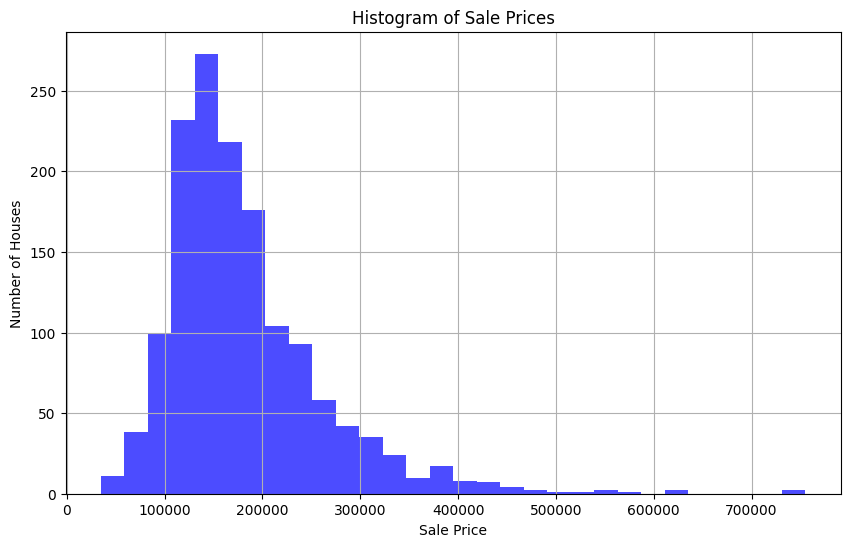

In [78]:
import matplotlib.pyplot as plt

# Create a histogram of the sale prices
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()


# K-Nearest Neighbors Model Training and Evaluation

In [79]:
# Assuming X_train_preprocessed and y_train are already defined and preprocessed
X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
    X_train_preprocessed, y_train, test_size=0.2, random_state=42)

# Function to train and evaluate a KNN model with a variable number of neighbors
def train_evaluate_knn(n_neighbors, X_train, y_train, X_test, y_test):
    # Create a KNN model with the specified number of neighbors
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Fit the model on the training data
    knn_model.fit(X_train, y_train)
    
    # Predict on the test data
    predictions = knn_model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    return mae, mse

# Example usage: Evaluate KNN with 3 neighbors
mae, mse = train_evaluate_knn(3, X_train_part, y_train_part, X_test_part, y_test_part)
print(f'MAE with 3 neighbors: {mae}, MSE with 3 neighbors: {mse}')

# Evaluate KNN with 5 neighbors
mae, mse = train_evaluate_knn(5, X_train_part, y_train_part, X_test_part, y_test_part)
print(f'MAE with 5 neighbors: {mae}, MSE with 5 neighbors: {mse}')



MAE with 3 neighbors: 31019.474885844753, MSE with 3 neighbors: 2382597572.6925416
MAE with 5 neighbors: 29298.278767123287, MSE with 5 neighbors: 2359467665.818219


# Decision Tree Model Training and Evaluation

In [80]:

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_preprocessed, y_train)
tree_predictions = tree_model.predict(X_test_part)
tree_mae = mean_absolute_error(y_test_part, tree_predictions)
tree_mse = mean_squared_error(y_test_part, tree_predictions)
print(f'Decision Tree MAE: {tree_mae}, Decision Tree MSE: {tree_mse}')


Decision Tree MAE: 0.0, Decision Tree MSE: 0.0


In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the Decision Tree model with constraints to prevent overfitting
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

# Fit the model on the part of the training data set aside for training
tree_model.fit(X_train_part, y_train_part)

# Predict on the part of the training data set aside for testing
tree_predictions = tree_model.predict(X_test_part)

# Evaluate the model
tree_mae = mean_absolute_error(y_test_part, tree_predictions)
tree_mse = mean_squared_error(y_test_part, tree_predictions)

print(f'Decision Tree MAE: {tree_mae}, Decision Tree MSE: {tree_mse}')


Decision Tree MAE: 26222.93015791965, Decision Tree MSE: 1657312887.6299899


In [86]:
''' USED FOR MAKING A CHART!
from sklearn.tree import export_graphviz
import graphviz

# Assuming the tree_model has already been trained
dot_data = export_graphviz(tree_model, out_file=None, 
                           feature_names=pd.get_dummies(X_train[categorical_cols.tolist() + numerical_cols.tolist()]).columns,  
                           class_names=['SalePrice'],
                           filled=True, rounded=True,  
                           special_characters=True)

# Generate the graph
graph = graphviz.Source(dot_data)
try:
    graph.view() 
finally:
    print("graph made!")'''

' USED FOR MAKING A CHART!\nfrom sklearn.tree import export_graphviz\nimport graphviz\n\n# Assuming the tree_model has already been trained\ndot_data = export_graphviz(tree_model, out_file=None, \n                           feature_names=pd.get_dummies(X_train[categorical_cols.tolist() + numerical_cols.tolist()]).columns,  \n                           class_names=[\'SalePrice\'],\n                           filled=True, rounded=True,  \n                           special_characters=True)\n\n# Generate the graph\ngraph = graphviz.Source(dot_data)\ntry:\n    graph.view() \nfinally:\n    print("graph made!")'